# Linear algebra

**Linear algebra** is one of the most useful areas of mathematics in all applied work, including data science, artificial intelligence, and machine learning.

## Vectors in two dimensions

In everyday life, we are used to doing arithmetics with numbers, such as

In [8]:
5 + 3

8

and

In [37]:
10 * 5

50

The numbers 5 and 3 are mathematical objects. One can think of other kinds of mathematical objects. They may or may not be composed of numbers. In order to specify the location of a point on a two-dimensional plane you need a mathematical object composed of *two* different numbers: the $x$- and $y$-coordinates. Such a point may be given by a single mathematical object, $(5, 3)$, where we understand that the first number specifies the $x$-coordinate, while the second the $y$-coordinate &mdash; the order of numbers in this pair matters.

We can visualise this mathematical object by means of a plot:

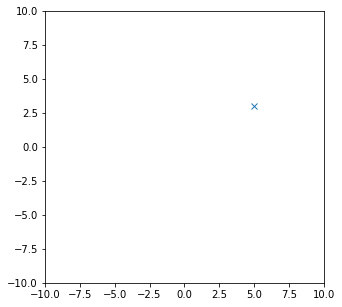

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(5, 3, 'x')
plt.xlim(-10, 10)
plt.ylim(-10, 10);

It may be useful to think of this object, $(5, 3)$, (which we shall call a **vector**) as *displacement* from the **origin** $(0, 0)$. We can then read $(5, 3)$ as "go to the right (of the origin) by five units, and then go up (from the origin) by three units". Therefore vectors may be visualised by *arrows* as well as by *points*:

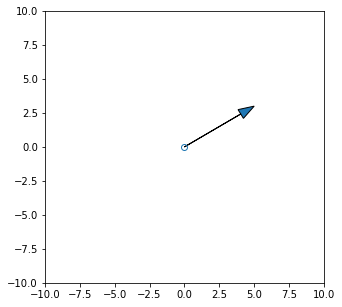

In [44]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, 5, 3, head_width=.75, length_includes_head=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

## Vector addition

Would it make sense to define **addition** for vectors? And if it would, how would we define it? Thinking of vectors as displacements gives us a clue: the sum of two vectors, $\mathbf{u}$ and $\mathbf{v}$, could be defined by "go in the direction specified by $\mathbf{u}$, then in the direction specified by $\mathbf{v}$".

If, for example, $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$, then their sum would be obtained as follows:
* Start at the origin.
* Move in the direction specified by $\mathbf{u}$: "go to the right by five units, and then go up by three units".
* Then move in the direction specified by $\mathbf{v}$: "go to the right by four units, and then go up by six units".

The end result?

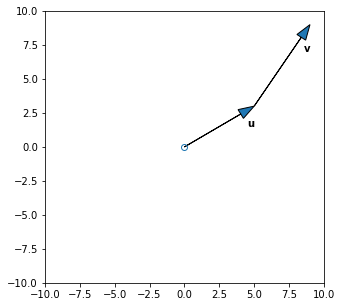

In [260]:
u = np.array((5, 3))
v = np.array((4, 6))
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Geometrically, we have appended the arrow representing the vector $\mathbf{v}$ to the end of the arrow representing the vector $\mathbf{u}$ drawn starting at the origin.

What if we started at the origin, went in the direction specified by $\mathbf{v}$ and then went in the direction specified by $\mathbf{u}$? Where would we end up?

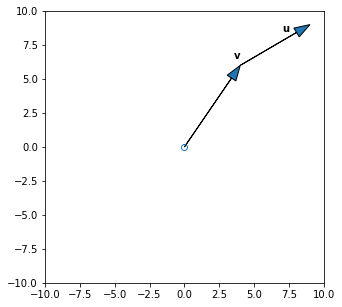

In [252]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

We would end up in the same place! More generally, for any vectors $\mathbf{u}$ and $\mathbf{v}$, vector addition is **commutative**, in other words, $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$. Let us visualise this on a plot:

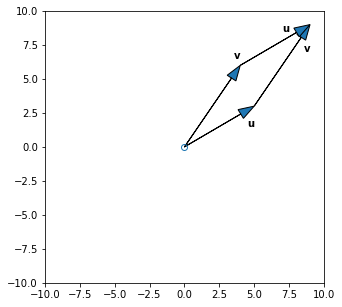

In [261]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

The sum $\mathbf{u} + \mathbf{v}$ (which, of course, is equal to $\mathbf{v} + \mathbf{u}$ since vector addition is commutative) is itself a vector, which is represented by the diagonal of the parallelogram formed by the arrows above:

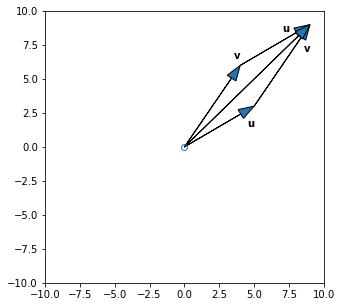

In [264]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.arrow(0, 0, u[0] + v[0], u[1] + v[1], head_width=.75, length_includes_head=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

We observe that the sum of $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$ is given by adding them *element-wise* or *coordinate-wise*: $\mathbf{u} + \mathbf{v} = (5 + 4, 3 + 6) = (9, 9)$. It is indeed unsurprising that vector addition is commutative, since the addition of ordinary numbers is commutative: $$\mathbf{u} + \mathbf{v} = (5 + 4, 3 + 6) = (4 + 5, 6 + 3) = \mathbf{v} + \mathbf{u}.$$

## Scalar multiplication

Would it make sense to multiply a vector, such as $\mathbf{u} = (5, 3)$ by a number, say $\alpha = 1.5$ (we'll start referring to ordinary numbers as **scalars**)? A natural way to define **scalar multiplication** of vectors would also be element-wise:
$$\alpha \mathbf{u} = 1.5 (5, 3) = (1.5 \cdot 5, 1.5 \cdot 3) = (7.5, 4.5).$$

How can we interpret this geometrically? Well, it turns out that we obtain a vector whose length is $1.5$ times that of $u$, and whose direction is the same as that of $u$:

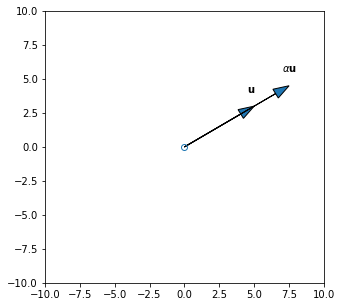

In [273]:
alpha = 1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, 1.))
plt.arrow(0, 0, alpha * u[0], alpha * u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\alpha \mathbf{u}$', alpha * u + (-.5, 1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

What if, instead, we multiplied $\mathbf{u}$ by $\beta = -1.5$? Well,
$$\beta \mathbf{u} = -1.5(5, 3) = (-7.5, -4.5).$$

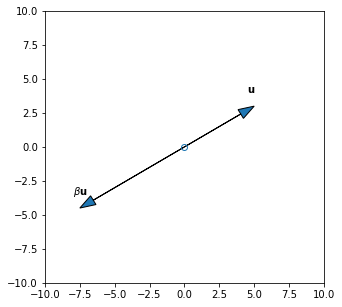

In [288]:
beta = -1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, 1.))
plt.arrow(0, 0, beta * u[0], beta * u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\beta \mathbf{u}$', beta * u + (-.5, 1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Geometrically, we have obtained a vector whose length is $1.5$ times that of $\mathbf{u}$, and whose direction is the *opposite* (because $\beta$ is negative) to that of $\mathbf{u}$.

## The length of a vector: vector norm

By the way, how do we obtain the length of a vector? By Pythagoras's theorem, we add up the coordinates and take the square root:

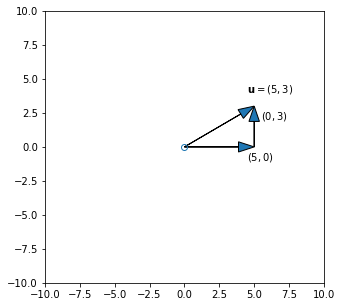

In [293]:
beta = -1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u} = (5, 3)$', u + (-.5, 1.))
plt.arrow(0, 0, u[0], 0, head_width=.75, length_includes_head=True)
plt.annotate(r'$(5, 0)$', np.array((u[0], 0)) + (-.5, -1.))
plt.arrow(u[0], 0, 0, u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$(0, 3)$', u + (.5, -1.))
#plt.annotate(r'$\mathbf{u}$', np.array((u[0], 0)) + (-.5, -1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

The resulting quantity, which is equal to the length of the vector, is called the **norm** of the vector and is denoted by
$$\|u\| = \sqrt{u_1^2 + u_2^2} = \sqrt{5^2 + 3^2} = \sqrt{34} = 5.8309518... .$$

Notice that, in Python, we can use NumPy arrays to represent vectors:

In [294]:
import numpy
u = np.array((5, 3))
u

array([5, 3])

In [295]:
v = np.array((4, 6))
v

array([4, 6])

NumPy "knows" the correct definition of vector addition:

In [296]:
u + v

array([9, 9])

In [297]:
v + u

array([9, 9])

It also knows the correct definition of multiplication of vectors by scalars:

In [298]:
alpha = 1.5
alpha * u

array([ 7.5,  4.5])

To obtain the norm of a vector, we can use

In [299]:
np.linalg.norm(u)

5.8309518948453007

## The inner product, the angle between two vectors

The **inner product** or **dot product** of two vectors is the sum of products of their respective coordinates:
$$\langle \mathbf{u}, \mathbf{v} \rangle = u_1 \cdot v_1 + u_2 \cdot v_2.$$

In particular, for $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$, it is given by
$$\langle \mathbf{u}, \mathbf{v} \rangle = 5 \cdot 4 + 3 \cdot 6 = 38.$$

We can check our calculations using Python:

In [300]:
np.dot(u, v)

38

It is easy to see that
$$\|\mathbf{u}\| = \sqrt{\langle \mathbf{u}, \mathbf{u} \rangle}.$$

It is also easy to notice that the inner product is **commutative**,
$$\langle \mathbf{u}, \mathbf{v} \rangle = \langle \mathbf{v}, \mathbf{u} \rangle.$$

Furthermore, if $\alpha$ is a scalar, then
$$\langle \alpha \mathbf{u}, \mathbf{v} \rangle = \alpha \langle \mathbf{u}, \mathbf{v} \rangle,$$
and
$$\langle \mathbf{u} + \mathbf{v}, \mathbf{w} \rangle = \langle \mathbf{u}, \mathbf{w} \rangle + \langle \mathbf{v}, \mathbf{w} \rangle;$$
these two properties together are referred to as **linearity in the first argument**.

The inner product is **positive-definite**. In other words, for all vectors $\mathbf{u}$,
$$\langle \mathbf{u}, \mathbf{u} \rangle \geq 0,$$
and
$$\langle \mathbf{u}, \mathbf{u} \rangle = 0$$
if and only if $\mathbf{u}$ is the **zero vector**, $\mathbf{0}$, i.e. the vector whose elements are all zero.

One can use the following formula to find the angle $\theta$ between two vectors $\mathbf{u}$ and $\mathbf{v}$:
$$\cos \theta = \frac{\langle \mathbf{u}, \mathbf{v} \rangle}{\|\mathbf{u}\| \|\mathbf{v}\|}.$$

Thus, in our example, with $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$, the angle between the vectors is given by

In [303]:
np.arccos(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))

0.44237422297674489

radians or

In [306]:
0.44237422297674489 / np.pi * 180.

25.34617594194669

degrees. We can visually verify that this is indeed true:

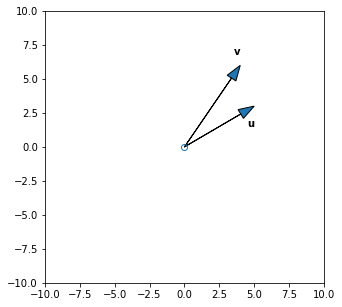

In [314]:
u = np.array((5, 3))
v = np.array((4, 6))
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .75))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

## Vectors in three dimensions

So far, we have considered vectors that have two coordinates each, corresponding to coordinates on the two-dimensional plane. Instead, we could consider three-dimensional vectors, such as $a = (3, 5, 7)$ and $b = (4, 6, 4)$:

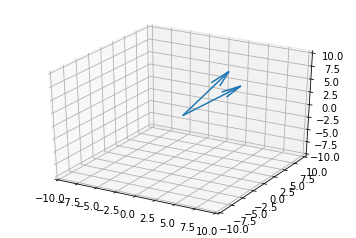

In [316]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-10, 10))
ax.quiver(0, 0, 0, 3, 5, 7)
ax.quiver(0, 0, 0, 4, 6, 4);

In the three-dimensional case, vector addition and multiplication by scalars are defined elementwise, as before:

In [315]:
a = np.array((3., 5., 7.))
b = np.array((4., 6., 4.))
a + b

array([  7.,  11.,  11.])

In [92]:
alpha * a

array([  4.5,   7.5,  10.5])

In [93]:
beta = -alpha
beta * a

array([ -4.5,  -7.5, -10.5])

## Vectors in general

We needn't restrict ourselves to three-dimensional vectors. We could easily define $c = (4, 7, 8, 2)$ and $d = (-12, 3, 7, 3)$, and do arithmetic element-wise, as before:

In [96]:
c = np.array((4, 7, 8, 2))
d = np.array((-12, 3, 7, 3))
c + d

array([-8, 10, 15,  5])

In [99]:
alpha * c

array([  6. ,  10.5,  12. ,   3. ])

The problem is that we wouldn't be able to visualise four-dimensional vectors. (We can nonetheless gain some geometric intuition by "pretending" that we deal with familiar two- and three-dimensional spaces.

Notice that it would only make sense to talk about adding the vectors $u$ and $v$ if they have the same number of elements. In general, we talk about the **vector space** of two-dimensional vectors, $\mathbb{R}^2$, the vector space of three-dimensional vectors, $\mathbb{R}^3$, the vector space of four-dimensional vectors, $\mathbb{R}^4$, etc. and write $$(3, 5, 7) \in \mathbb{R}^3$$ meaning that the vector $(3, 5, 7)$ is an element of $\mathbb{R}^3$. It makes sense to talk about the addition of two vectors if they belong to the same vector space.

Mathematicians like abstraction. Indeed, much of the power of mathematics is in abstraction. The notions of a vector and vector space can be further generalised as follows.

Formally, a **vector space** over a field $F$ is a set $V$ together with two operations that satisfy the following eight axioms, the first four axioms stipulate the properties of vector addition alone, whereas the last four involve scalar multiplication:

* **A1**: Associativity of addition: $(u + v) + w = u + (v + w)$.
* **A2**: Commutativity of addition: $u + v = v + u$.
* **A3**: **Identity** element of addition: there exists an element $0 \in V$, called the **zero vector**, such that $0 + v = v$ for all $v \in V$.
* **A4**: **Inverse** elements of addition: $v + (-v) = 0$.
* **S1**: Distributivity of scalar multiplication over vector addition: $\alpha(u + v) = \alpha u + \alpha v$.
* **S2**: Distributivity of scalar multiplication over field addition: $(\alpha + \beta)v = \alpha v + \beta v$.
* **S3**: Compatibility of scalar multiplication with field multiplication: $\alpha (\beta v) = (\alpha \beta) v$.
* **S4**: **Identity** element of scalar multiplication, preservation of scale: $1 v = v$.



In [100]:
u = np.array((3., 5., 7.))
v = np.array((4., 6., 4.))
w = np.array((-3., -3., 10.))

In [101]:
(u + v) + w

array([  4.,   8.,  21.])

In [102]:
u + (v + w)

array([  4.,   8.,  21.])

In [103]:
(u + v) + w == u + (v + w)

array([ True,  True,  True], dtype=bool)

In [106]:
np.all((u + v) + w == u + (v + w))

True

In [107]:
np.all(u + v == v + u)

True

In [112]:
zero = np.array((0., 0., 0.))

In [113]:
np.all(zero + v == v)

True

In [114]:
np.all(np.array(v + (-v) == zero))

True

In [ ]:
alpha = -5.
beta = 7.

In [116]:
np.all(alpha * (u + v) == alpha * u + alpha * v)

True

In [117]:
np.all((alpha + beta) * v == alpha * v + beta * v)

True

In [118]:
np.all(alpha * (beta * v) == (alpha * beta) * v)

True

In [122]:
np.all(1 * v == v)

True

In [128]:
u = lambda x: 2. * x

In [151]:
v = lambda x: x * x

In [152]:
w = lambda x: 3. * x + 1.

In [153]:
def plus(f1, f2):
    return lambda x: f1(x) + f2(x)

In [154]:
lhs = plus(plus(u, v), w)

In [155]:
rhs = plus(u, plus(v, w))

In [156]:
lhs

<function __main__.plus.<locals>.<lambda>>

In [157]:
rhs

<function __main__.plus.<locals>.<lambda>>

In [158]:
lhs(5.)

51.0

In [159]:
rhs(5.)

51.0

In [160]:
lhs(5.) == rhs(5.)

True

In [162]:
lhs(10.) == rhs(10.)

True

In [163]:
plus(u, v)

<function __main__.plus.<locals>.<lambda>>

In [164]:
plus(u, v)(5.)

35.0

In [165]:
plus(u, v)(5.) == plus(v, u)(5.)

True

In [166]:
def scalar_product(s, f):
    return lambda x: s * f(x)

In [168]:
lhs = scalar_product(alpha, plus(u, v))
rhs = plus(scalar_product(alpha, u), scalar_product(alpha, v))
lhs(5.) == rhs(5.)

True

In [200]:
u = np.array((4., 6.))
v = np.array((5., 3.))
alpha = -.5
beta = 2.
w = alpha * u + beta * v

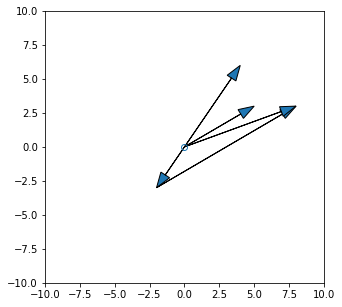

In [203]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.arrow(0, 0, alpha*u[0], alpha*u[1], head_width=.75, length_includes_head=True)
plt.arrow(alpha*u[0], alpha*u[1], beta*v[0], beta*v[1], head_width=.75, length_includes_head=True)
plt.arrow(0, 0, w[0], w[1], head_width=.75, length_includes_head=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

In [205]:
w = np.array((-5., 2.5))

In [206]:
90-35

55

In [207]:
55/14

3.9285714285714284

In [208]:
3*14

42

In [209]:
55-42

13

In [212]:
(-55/14) * u + (15/7) * v

array([ -5.        , -17.14285714])

In [216]:
2.*u - 3.*v

array([-7.,  3.])

Now let us suppose that we are given a vector in two dimensions, say, $w = (-7, 3)$:

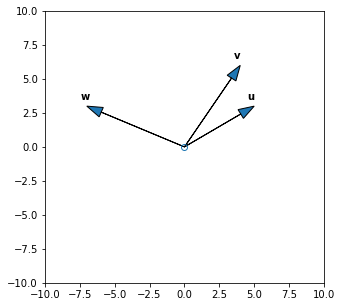

In [274]:
w = np.array((-7., 3.))
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, .5))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{v}$', v + (-.5, .5))
plt.arrow(0, 0, w[0], w[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{w}$', w + (-.5, .5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Can we obtain this vector as a linear combination of $\mathbf{u}$ and $\mathbf{v}$? In other words, can we find the scalars $\alpha$ and $\beta$ such that $$\alpha u + \beta v = w?$$

This seems easy enough: what we really need is
$$\alpha (4, 6) + \beta (5, 3) = (-7, 3),$$
i.e.
$$(4\alpha, 6\alpha) + (5\beta, 3\beta) = (-7, 3),$$
or
$$(4\alpha + 5\beta, 6\alpha + 3\beta) = (-7, 3).$$

The left-hand side and the right-hand side must be equal coordinatewise. Thus we obtain a system of linear equations
$$4\alpha + 5\beta = -7,$$
$$6\alpha + 3\beta = 3.$$

From the second linear equation, we obtain
$$\alpha = \frac{3 - 3\beta}{6} = \frac{1 - \beta}{2}.$$
We substitute this into the first linear equation, obtaining
$$4 \cdot \frac{1 - \beta}{2} + 5\beta = -7,$$
whence $\beta = -3$, and so $\alpha = \frac{1 - (-3)}{2} = 2$.